## Интеллектуальный анализ данных – весна 2025
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

* Если в задании есть вопрос на рассуждение, то за отсутствие ответа на него балл за задание будет снижен вполовину.

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать с усеченным датасетом `Palmer Penguins`, содержащим информацию о характеристиках трех видов пингвинов: `Adelie`, `Chinstrap` и `Gentoo`:



*   Species — вид пингвина (целевая переменная).
*   Island — остров, на котором была сделана запись.
*   Clutch Completion — завершенность кладки яиц.
*   Date Egg — закодированная дата откладки яиц (число дней от самой ранней даты в данных).
*   Culmen Length (mm) — длина клюва.
*   Culmen Depth (mm) — глубина клюва.
*   Flipper Length (mm) — длина ласт.
*   Body Mass (g) — масса тела в граммах.
*   Sex — пол особи.
*   Delta 15 N (o/oo) и Delta 13 C (o/oo) — изотопные значения, характеризующие пищевые предпочтения.

Описание полного набора данных и дополнительную информацию о проекте можно найти [здесь](https://allisonhorst.github.io/palmerpenguins/index.html) и [здесь](https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data?resource=download).

![Palmer Penguins](https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png)



In [1]:
print("sdf")

sdf


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('penguins_data.csv')
data.head(10)

,Species,Island,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,Chinstrap,Dream,Yes,382,50.9,19.1,196.0,3550.0,MALE,10.02372,-24.86594
1,Chinstrap,Dream,Yes,741,45.2,17.8,198.0,3950.0,FEMALE,8.88942,-24.49433
2,Gentoo,Biscoe,Yes,744,46.5,13.5,210.0,4550.0,FEMALE,7.99530,-25.32829
3,Chinstrap,Dream,Yes,10,45.2,16.6,191.0,3250.0,FEMALE,9.62357,-24.78984
4,Gentoo,Biscoe,Yes,13,48.4,14.4,203.0,4625.0,FEMALE,8.16582,-26.13971
5,Gentoo,Biscoe,Yes,22,48.1,15.1,209.0,5500.0,MALE,8.45738,-26.22664
6,Gentoo,Biscoe,Yes,13,51.1,16.5,225.0,5250.0,MALE,8.20660,-26.36863
7,Gentoo,Biscoe,No,392,42.7,13.7,208.0,3950.0,FEMALE,8.14567,-26.59467
8,Adelie,Biscoe,Yes,14,39.6,20.7,191.0,3900.0,FEMALE,8.80967,-26.78958
9,Gentoo,Biscoe,Yes,735,46.1,13.2,211.0,4500.0,FEMALE,7.99300,-25.51390


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные признаки? Если да, то закодируйте их самым оптимальным способом. Аргументируйте свой выбор.

In [5]:
data.isnull().sum()

,0
Species,0
Island,0
Clutch Completion,0
Date Egg,0
Culmen Length (mm),2
Culmen Depth (mm),2
Flipper Length (mm),2
Body Mass (g),2
Sex,10
Delta 15 N (o/oo),14


Да, пропущенные значения есть

In [6]:
data = data.dropna()

In [7]:
cat_features_mask = (data.dtypes == "object").values
cat_features_mask

array([ True,  True,  True, False, False, False, False, False,  True,
       False, False])

В data есть категориальные признаки... Воспользуемся One-hot-encoding, так как наши признаки это признаки, принимающее значения из неупорядоченного конечного множества. Но для начала разделим целевую переменную от остальных признаков

In [8]:
y = data["Species"]
X = data.drop("Species", axis=1)
X = pd.get_dummies(X, drop_first=True)
X

,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Island_Dream,Island_Torgersen,Clutch Completion_Yes,Sex_FEMALE,Sex_MALE
0,382,50.9,19.1,196.0,3550.0,10.02372,-24.86594,True,False,True,False,True
1,741,45.2,17.8,198.0,3950.0,8.88942,-24.49433,True,False,True,True,False
2,744,46.5,13.5,210.0,4550.0,7.99530,-25.32829,False,False,True,True,False
3,10,45.2,16.6,191.0,3250.0,9.62357,-24.78984,True,False,True,True,False
4,13,48.4,14.4,203.0,4625.0,8.16582,-26.13971,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
339,382,47.6,18.3,195.0,3850.0,8.83502,-24.65859,True,False,True,True,False
340,382,39.7,18.4,190.0,3900.0,9.29808,-25.23453,False,True,True,False,True
341,16,38.6,17.2,199.0,3750.0,8.77322,-26.48973,False,False,True,True,False
342,392,46.6,14.2,210.0,4850.0,8.38289,-26.86352,False,False,True,True,False


Целевую категориальную переменную закодируйте в ординальном порядке: Chinstrap = 0, Gentoo = 1, Adelie = 2. Можно воспользоваться [OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html).

Теперь сохраним информацию о признаках в переменную
`X`, а о целевой переменной – в переменную `y`.

In [9]:
from sklearn.preprocessing import OrdinalEncoder
categories = [['Chinstrap', 'Gentoo', 'Adelie']]
encoder = OrdinalEncoder(categories=categories)
y = encoder.fit_transform(data[['Species']])
y = y.ravel()
y

array([0., 0., 1., 0., 1., 1., 1., 1., 2., 1., 1., 2., 2., 2., 1., 2., 2.,
       1., 1., 2., 2., 2., 1., 0., 0., 2., 0., 2., 0., 2., 2., 0., 2., 2.,
       1., 0., 2., 0., 1., 1., 1., 2., 2., 1., 2., 0., 2., 1., 1., 2., 2.,
       0., 2., 0., 0., 1., 0., 2., 1., 2., 1., 0., 2., 2., 2., 2., 1., 2.,
       2., 1., 1., 1., 2., 2., 2., 1., 2., 1., 1., 2., 0., 0., 2., 2., 1.,
       2., 0., 1., 1., 2., 1., 0., 2., 2., 1., 2., 2., 2., 2., 1., 2., 1.,
       1., 0., 2., 1., 2., 2., 0., 2., 1., 1., 2., 2., 2., 1., 1., 2., 1.,
       1., 1., 2., 0., 1., 1., 1., 0., 2., 2., 1., 2., 1., 2., 0., 2., 2.,
       2., 2., 2., 2., 1., 0., 2., 2., 1., 2., 1., 0., 1., 0., 1., 1., 1.,
       0., 1., 2., 2., 1., 1., 0., 2., 1., 2., 1., 1., 1., 1., 0., 0., 1.,
       0., 1., 2., 2., 0., 1., 2., 1., 1., 2., 2., 1., 2., 2., 1., 2., 0.,
       0., 2., 0., 1., 2., 1., 2., 1., 2., 0., 2., 0., 2., 2., 0., 2., 1.,
       2., 1., 2., 2., 1., 0., 0., 2., 2., 1., 0., 2., 2., 1., 2., 2., 1.,
       1., 1., 2., 1., 0.

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

Используйте аргумент `stratify` при разбиении. Почему это важно?

In [27]:
np.random.seed(123)

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y)

Этот параметр (stratify) позволяет сохранить пропорции классов целевой переменной в обеих выборках (обучающей и тестовой). Без него может произойти случай, когда в тренировочную выборку не попадет один из классов, тогда модель вообще не будет предсказывать такой класс.

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака:  `Flipper Length (mm)` и `Body Mass (g)`  – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [68]:
# масштабируем признаки только нужные!

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[["Flipper Length (mm)", "Body Mass (g)"]])
X_test_scaled = scaler.transform(X_test[["Flipper Length (mm)", "Body Mass (g)"]])

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

models = []
k_best = -1
best_accuracy = 0
print('NN\tTrain\tTest')
for k in [1, 3, 5, 10, 15, 25]:
    model = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    model.fit(X_train_scaled, y_train)

    y_predicted = model.predict(X_train_scaled)
    val_accuracy_train = accuracy_score(y_train, y_predicted)
    y_predicted = model.predict(X_test_scaled)
    val_accuracy_test = accuracy_score(y_test, y_predicted)

    print(f'{k}\t{val_accuracy_train:0.2f}\t{val_accuracy_test:0.2f}')
    models.append(model)

NN	Train	Test
1	0.98	0.78
3	0.87	0.77
5	0.85	0.72
10	0.84	0.81
15	0.83	0.79
25	0.84	0.78


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/).

In [14]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [15]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов.
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново.
6. Построение графика может занять некоторое время – придётся немного подождать!

In [16]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

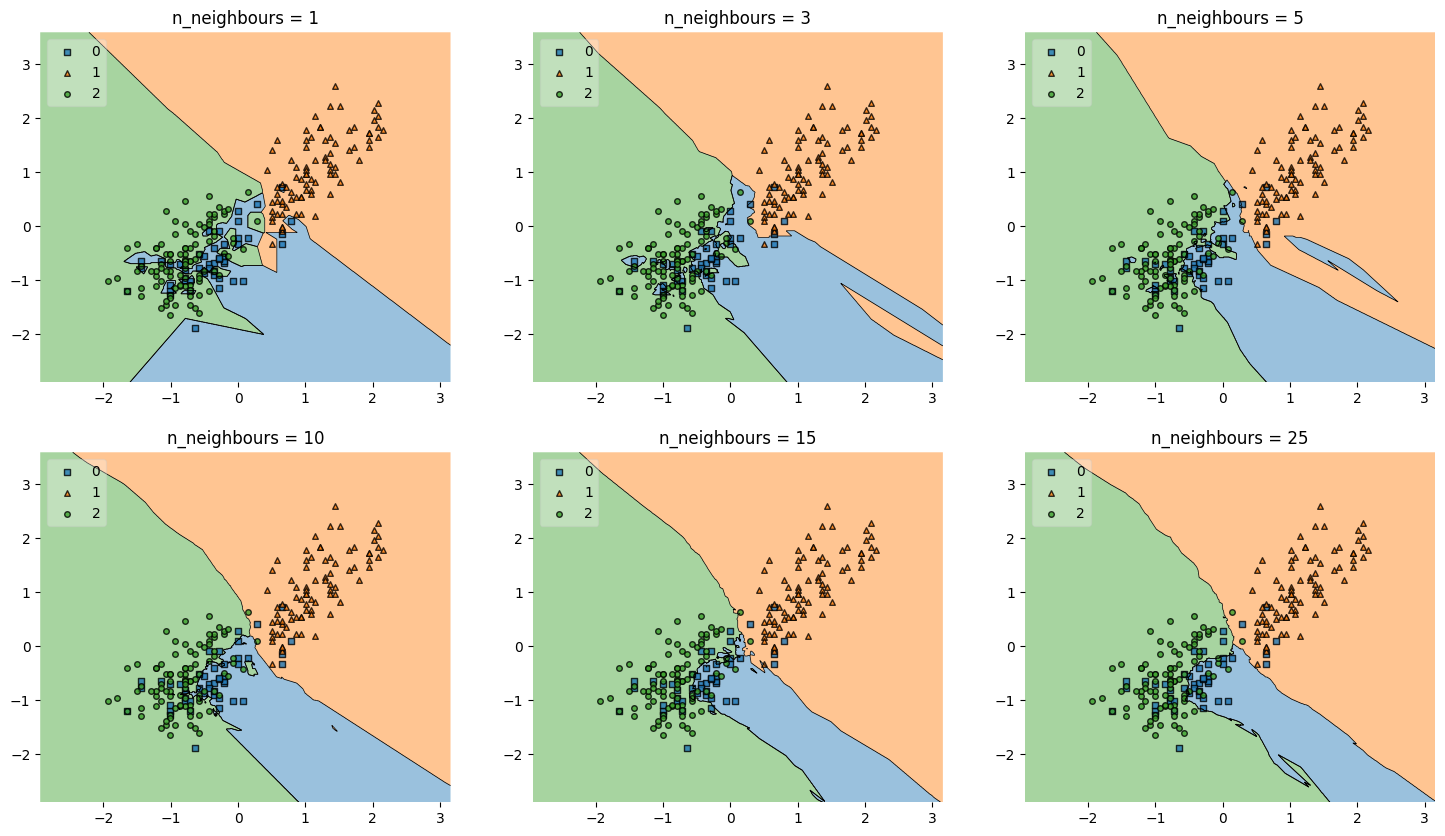

In [32]:
gs = gridspec.GridSpec(2, 3)
fig = plt.figure(figsize=(18, 10))

for clf, grd in zip(models, itertools.product([0, 1, 2], repeat=2)):
  ax = plt.subplot(gs[grd[0], grd[1]])
  fig = plot_decision_regions(X=X_train_scaled, y=y_train.astype(np.int64), clf=clf, legend=2, scatter_kwargs={'s': 16})

  plt.title(f'n_neighbours = {clf.n_neighbors}')

plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности. Какие из результатов явно говорят о переобучении модели? Почему?

При k=1 на обучающей выборке доля верных ответов очень высокая, в то время как на тестовой выборке она значительно меньше, что является признаком переобучения. На графике это в целом тоже заметно: сложная поверхность с "островками" в некоторых местах.
При k=25 разница в долях верных ответах уже лучше, однако не такая хорошая, как при k=10. Графики их в целом практически нечем не отличаются, потому по-моему мнению, самое оптимальное число соседей при k=10.

### Задание 2. KNN своими руками. 2,5 балла

**Задача 2.1 (2 балла)** В данном задании мы попробуем реализовать алгоритм KNN своими руками, делать мы будем KNN именно для классификации.

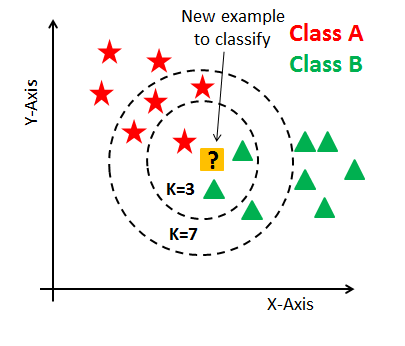

Рекомендации по реализации:
- Используйте `numpy` для представления данных в виде массивов, чтобы минимизировать преобразования.
- Избегайте циклов по всем объектам, по возможности используйте векторизированные операции.
- Обратите внимание на методы [np.linalg.norm()](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html) и [np.argsort()](https://numpy.org/doc/stable/reference/generated/numpy.argsort.html), а также на класс `collections.Counter`.
- Особый плюс, если учтёте обработку возможных ошибок.

In [57]:
import numpy as np
import math
from collections import Counter

class KNN:
    def __init__(self, k:int):
        self.k = k

    def fit(self, X, y):

      # YOUR CODE HERE
      # (⌒_⌒;)

      # нужно запомнить всю тренировочную выборку
      self.X_train = X
      self.y_train = y

    def predict(self, X):

      # YOUR CODE HERE
      # (＠_＠)

      def predict_one(x):
        dist = self.count_distance(x, self.X_train)
        k_neighbours = np.argsort(dist)[:self.k]

        return Counter(self.y_train[k_neighbours]).most_common(1)[0][0]

      return np.array([predict_one(x) for x in X])

    def count_distance(self, x, y):

      # YOUR CODE HERE
      # ヽ(♡‿♡)ノ

      return np.linalg.norm(y - x, axis=1)

In [58]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [59]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

**Задача 2.2 (0.5 балла)** Протестируйте ваш алгоритм на данных о пингвинах. Выведите лучший получившийся результат на тестовой выборке.

In [84]:
k_best = -1
best_accuracy = 0
print('k\taccuracy')
for k in [1, 3, 5, 10, 15, 25]:
    model = KNN(k=k)
    model.fit(X_train_scaled, y_train)

    y_predicted = model.predict(X_test_scaled)
    val_accuracy = accuracy_score(y_test, y_predicted)

    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        k_best = k

    print(f'{k}\t{val_accuracy}')

print(f'Лучший результат при k={k_best}')

k	accuracy
1	0.7244897959183674
3	0.7653061224489796
5	0.7857142857142857
10	0.7857142857142857
15	0.7857142857142857
25	0.8469387755102041
Лучший результат при k=25


Видимо потому что расстояния считаем по-другому ?возможно?

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [101]:
data = pd.read_csv('diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.2 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их.
Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [102]:
data.isna().sum()

,0
Unnamed: 0,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0


Пропусков нет! Самое очевидное, что стоит удалить - кастомные индексы.

Не стал удалять, но кажется, что есть признак, который можно не рассматривать. А именно depth, так как это по факту признак, который можно вычислить с помощью x, y, z, которые нам уже даны.

In [103]:
data = data.drop(['Unnamed: 0'], axis=1)
data.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**Задача 3.2 (0.2 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Постройте матрицу корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки имеют наибольшую корреляцию с целевой переменной?

In [99]:
data.corr(numeric_only=True)

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


зызызызызхыхыхыхы, все-таки depth кажется точно не поможет. Наибольшую корреляцию с price имеет признак carat, а также признаки x, y, z. Все логично :)

**Задача 3.3 (0.2 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные признаки методом OneHot-кодирования (`pd.get_dummies()` или `OneHotEncoder` из `sklearn`).

In [104]:
data = pd.get_dummies(data, drop_first=True)
data

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,False,True,False,...,False,False,False,False,False,True,False,False,False,False
1,0.21,59.8,61.0,326,3.89,3.84,2.31,False,False,True,...,False,False,False,False,True,False,False,False,False,False
2,0.23,56.9,65.0,327,4.05,4.07,2.31,True,False,False,...,False,False,False,False,False,False,True,False,False,False
3,0.29,62.4,58.0,334,4.20,4.23,2.63,False,False,True,...,False,True,False,False,False,False,False,True,False,False
4,0.31,63.3,58.0,335,4.34,4.35,2.75,True,False,False,...,False,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,False,True,False,...,False,False,False,False,True,False,False,False,False,False
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,True,False,False,...,False,False,False,False,True,False,False,False,False,False
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,False,False,False,...,False,False,False,False,True,False,False,False,False,False
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,False,False,True,...,True,False,False,False,False,True,False,False,False,False


**Задача 3.4 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [110]:
y = data['price']
X = data.drop('price', axis=1)

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

**Задача 3.5 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче стандартизируйте вещественные признаки в тренировочной и тестовой выборках с помощью `StandardScaler`.

**Объясните**, как это повлияет на интерпретацию коэффициентов линейной регрессии.

После стандартизации коэффициенты линейной регрессии можно сравнивать между собой, чтобы определить, какой признак оказывает большее влияние на целевую переменную.

In [120]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Задача 3.6 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [121]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [122]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_predict_train = lr.predict(X_train_scaled)
y_predict_test = lr.predict(X_test_scaled)

print(f'train: {mean_squared_error(y_train, y_predict_train)}')
print(f'test: {mean_squared_error(y_test, y_predict_test)}')

train: 1294508.3748069352
test: 1237127.6336429259


**Задача 3.7 (0.3 балла)** Изучите [документацию](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [124]:
for column, weight in zip(X_train.columns, lr.coef_):
    print(f"{column}: {weight}")

carat: 5301.262524206166
depth: -71.86886353622094
table: -48.25745376027245
x: -1008.4854231735642
y: 26.093250628325023
z: -132.2574776480738
cut_Good: 171.97245589279055
cut_Ideal: 430.4667222811606
cut_Premium: 347.4799446686993
cut_Very Good: 315.4372270766181
color_E: -85.4526882796398
color_F: -109.79004263225399
color_G: -206.93219286727862
color_H: -358.05771392137973
color_I: -444.9371536547208
color_J: -527.2096655648758
clarity_IF: 959.4258234732375
clarity_SI1: 1553.0171793098427
clarity_SI2: 1004.1269260740751
clarity_VS1: 1627.762485345766
clarity_VS2: 1780.7592901669784
clarity_VVS1: 1251.269439367066
clarity_VVS2: 1433.4345723024803


Несложно заметить, что наибольшее влияние имеют веса по модулю относительно признаков: carat, x (из вещественных).

**Задача 3.8 (0.5 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом.

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией.

Обучите Lasso-регрессию и Ridge-регрессию, установив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [126]:
from sklearn.linear_model import Lasso, Ridge

In [129]:
lasso = Lasso(10).fit(X_train_scaled, y_train)
print("Lasso")
print(f"Train: {mean_squared_error(y_train, lasso.predict(X_train_scaled))}")
print(f"Test: {mean_squared_error(y_test, lasso.predict(X_test_scaled))}")
for column, weight in zip(X_train.columns, lasso.coef_):
    print(f"{column}: {weight}")

ridge = Ridge(10).fit(X_train_scaled, y_train)
for column, weight in zip(X_train.columns, ridge.coef_):
    print(f"{column}: {weight}")
print("\nRidge")
print(f"Train: {mean_squared_error(y_train, ridge.predict(X_train_scaled))}")
print(f"Test: {mean_squared_error(y_test, ridge.predict(X_test_scaled))}")

Lasso
Train: 1354235.4713049973
Test: 1303581.5878222466
carat: 4804.6038976984155
depth: -80.11130265397034
table: -57.80783804931129
x: -555.7092975445596
y: -0.0
z: -107.4145576940236
cut_Good: 45.68080623145902
cut_Ideal: 221.66295761384202
cut_Premium: 156.8569930228004
cut_Very Good: 142.253953551134
color_E: -15.404512087737423
color_F: -43.21654636729776
color_G: -129.49415651606395
color_H: -285.929809985781
color_I: -372.39458005674203
color_J: -466.4357978231864
clarity_IF: 646.8302036301394
clarity_SI1: 829.0961639447752
clarity_SI2: 377.7207859329794
clarity_VS1: 1013.7348113057109
clarity_VS2: 1071.8917328406826
clarity_VVS1: 823.9548562092589
clarity_VVS2: 937.8656112962179
carat: 5262.902443198981
depth: -69.11266907986085
table: -48.388522381470686
x: -959.3102759173776
y: 24.84711105860607
z: -143.88903451084195
cut_Good: 172.33169053591902
cut_Ideal: 431.26028438183033
cut_Premium: 348.02406436551047
cut_Very Good: 316.473129645298
color_E: -85.07429204680295
color_F

Коэффициенты уменьшились совсем чуть (процентов на 10)... :(

Но зато, например, обнулялся признак 'y'

В таком случае, нельзя сказать, что проблема мультиколлинеарности действительно была значимой.

**Задача 3.9 (0.5 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов.

Какой метод сильнее снижает норму коэффициентов? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

In [134]:
lasso_norms = []
ridge_norms = []

for alpha in [0.1, 1, 10, 100, 200]:
    lasso = Lasso(alpha)
    lasso.fit(X_train_scaled, y_train)
    lasso_norms.append(np.linalg.norm(lasso.coef_))

    ridge = Ridge(alpha)
    ridge.fit(X_train_scaled, y_train)
    ridge_norms.append(np.linalg.norm(ridge.coef_))

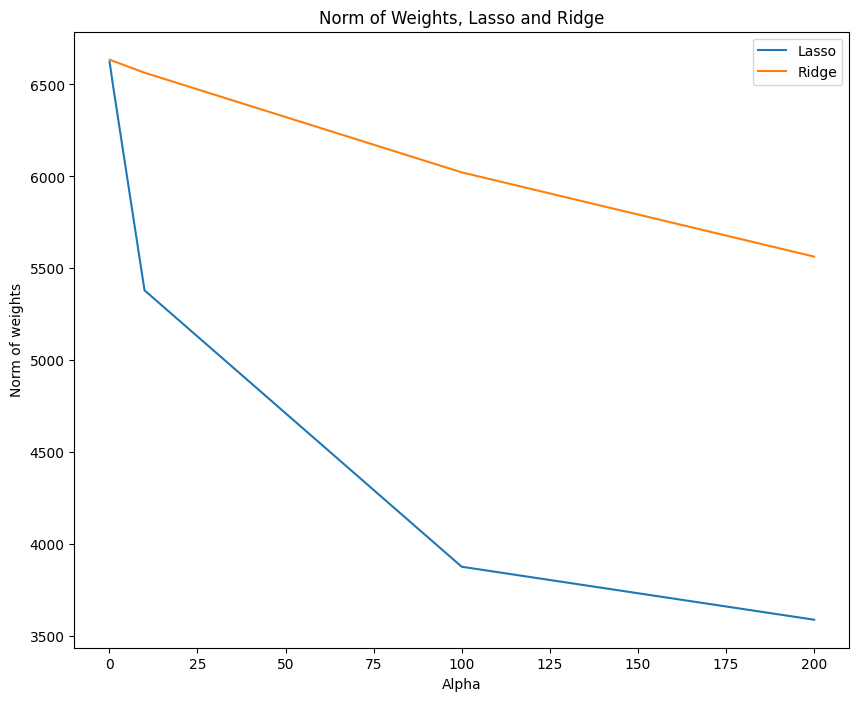

In [142]:
plt.figure(figsize=(10, 8))
plt.plot([0.1, 1, 10, 100, 200], lasso_norms, label='Lasso')
plt.plot([0.1, 1, 10, 100, 200], ridge_norms, label='Ridge')
plt.title('Norm of Weights, Lasso and Ridge')
plt.xlabel('Alpha')
plt.ylabel('Norm of weights')
plt.legend()
plt.show()

Невооруженным вглядом видно, что lasso уменьшает веса "жестче". Lasso-регрессию используют для отбора признаков, потому что она способна обнулять веса у менее важных признаков.

**Задача 3.10 (0.5 балла)**
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке.

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`.

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество.

In [144]:
from sklearn.linear_model import LassoCV

In [145]:
lasso_cv = LassoCV(alphas=[0.1, 1, 10, 100, 200], cv=5)
lasso_cv.fit(X_train_scaled, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 129531868.08795929, tolerance: 48187993.05718581
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7935402420.766628, tolerance: 48187993.05718581
  model = cd_fast.enet_coordinate_descent_gram(


LassoCV(alphas=[0.1, 1, 10, 100, 200], cv=5)

In [150]:
mse_means = lasso_cv.mse_path_.mean(axis=1)

print("Alphas:", lasso_cv.alphas_)
print("MSE для alpha:", mse_means)

best_alpha = lasso_cv.alphas_[np.argmin(mse_means)]
print("Значение alpha, которое дает наибольшее качество:", best_alpha)

Alphas: [2.e+02 1.e+02 1.e+01 1.e+00 1.e-01]
MSE для alpha: [2167032.98389442 1798602.93170335 1357868.08127131 1306389.54866129
 1371616.9893889 ]
Значение alpha, которое дает наибольшее качество: 1.0


**Задача 3.11 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [160]:
lasso = Lasso(0.4).fit(X_train_scaled, y_train)
print(f"Train: {mean_squared_error(y_train, lasso.predict(X_train_scaled))}")
print(f"Test: {mean_squared_error(y_test, lasso.predict(X_test_scaled))}")
for column, weight in zip(X_train.columns, lasso.coef_):
    print(f"{column}: {weight}")

Train: 1294611.2833050145
Test: 1237260.7007493475
carat: 5281.899560522678
depth: -73.112892879617
table: -48.69945169015423
x: -987.3885445030361
y: 14.560688514588064
z: -124.51757942072571
cut_Good: 167.06284683261026
cut_Ideal: 422.27868209491675
cut_Premium: 339.93241743360954
cut_Very Good: 308.71166289025996
color_E: -82.6394842615406
color_F: -107.1249370612321
color_G: -203.83225110709063
color_H: -355.1527182700616
color_I: -442.04256921794536
color_J: -524.7935830587548
clarity_IF: 946.9841967009472
clarity_SI1: 1524.20385982732
clarity_SI2: 979.1949886331338
clarity_VS1: 1603.3341775620759
clarity_VS2: 1752.5329925732044
clarity_VVS1: 1234.253221938581
clarity_VVS2: 1413.7065615855763


Ну вот как и было уже замечено ранее, у 'y' нулевой коэффициент, что раскрывает его низкую информативность. Аналогично и z мал.
Важны признаки 'carat' и категориальные признаки, связанные с 'clarity', они показывают достаточно высокие веса.

**Задача 3.12 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [164]:
pred_lasso = lasso.predict(X_test_scaled)

print(f'Lasso Test: {mean_squared_error(y_test, pred_lasso)}')
print(f'Linear Test: {mean_squared_error(y_test, y_predict_test)}')
print(mean_squared_error(y_test, pred_lasso) - mean_squared_error(y_test, y_predict_test))

Lasso Test: 1237260.7007493475
Linear Test: 1237127.6336429259
133.06710642157122


Удивительно, но факт: линейная регрессия (без регуляризации) оказалась даже получше Лассо, но совсем чуть-чуть. В этой задаче Lasso не очень подходит, так как при увелечении alpha и MSE тоже увеличивается.

Для текущего проекта можно было бы рассмотреть добавление полиномов, а именно кубических признаков (x^3, y^3 и тд)